##  <center> Deep Networks <br><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/MARCA-Color.jpg" title="Title text" width="20%" height="15%" /><br>Andrea Carolina Reales Villalba -- Jesus Eduardo Ortiz Sandoval <BR>Punto 2 </center>


 <b>a) Se trabajará con las etiquetas escaladas uniformemente, es decir, $\mu=0$ y $\sigma=1$, ajuste sobre el conjunto de entrenamiento y transforme éstas además de las de validación y pruebas.</b>

In [92]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import sys
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from keras import backend as K
import tensorflow as tf
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from keras import regularizers
from keras.optimizers import SGD
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

In [2]:
datos= pd.read_csv("C:/Users/Jesus/Documents/GitHub/roboBohr.csv")
total=len(datos)
df_train=datos[:int(0.6*total)]                       #60% de los datos
df_val=datos[int(0.6*total):int(0.85*total)]          #25% de los datos
df_test=datos[int(0.85*total)::]                      #15% restante

In [3]:

scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train_scaled = X_train_scaled.pop('Eat').values.reshape(-1,1)
X_val_scaled = pd.DataFrame(scaler.transform(df_val),columns=df_val.columns)
y_val_scaled = X_val_scaled.pop('Eat').values.reshape(-1,1)
X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_val.columns)
y_test_scaled = X_test_scaled.pop('Eat').values.reshape(-1,1)

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


<b>b) Para el mismo problema definido anteriormente ([sección 1](#primero)) se entrenarán diferentes redes. En esta primera instancia se trabajará con la misma red de la pregunta b), inicializada con pesos uniforme. Visualice el gradiente de la función de pérdida (*loss*) para el conjunto de entrenamiento (promedio del gradiente de cada dato) respecto a los pesos en las distintas capas, para esto se le pedirá el cálculo del gradiente para una capa mediante la función de *gradients* (__[link](https://www.tensorflow.org/api_docs/python/tf/keras/backend/gradients)__) en el *backend* de Keras. Deberá generar un **histograma** para todos los pesos de cada capa antes y despues del entrenamiento con 250 *epochs*. Comente.</b>

In [104]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
###calculate gradients
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]
history = model.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled));
loss1 = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors1 = model.trainable_weights 
gradients1 = K.gradients(loss1, listOfVariableTensors1) #We can now calculate the gradients.
sess1 = K.get_session()
evaluated_gradients1 = sess1.run(gradients1,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients1 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients1]

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 372us/step - loss: 0.1145 - val_loss: 0.0646
Epoch 2/250
9745/9745 [==============================] - 2s 255us/step - loss: 0.0632 - val_loss: 0.0696
Epoch 3/250
9745/9745 [==============================] - 3s 274us/step - loss: 0.0514 - val_loss: 0.0578
Epoch 4/250
9745/9745 [==============================] - 3s 263us/step - loss: 0.0471 - val_loss: 0.0398
Epoch 5/250
9745/9745 [==============================] - 2s 242us/step - loss: 0.0433 - val_loss: 0.0460
Epoch 6/250
9745/9745 [==============================] - 2s 253us/step - loss: 0.0413 - val_loss: 0.0460
Epoch 7/250
9745/9745 [==============================] - 2s 250us/step - loss: 0.0400 - val_loss: 0.0372
Epoch 8/250
9745/9745 [==============================] - 3s 257us/step - loss: 0.0386 - val_loss: 0.0414
Epoch 9/250
9745/9745 [==============================] - 2s 252us/step - loss: 0.0367 - val_loss: 0.0461
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.0050 - val_loss: 0.0070
Epoch 79/250
9745/9745 [==============================] - 2s 253us/step - loss: 0.0050 - val_loss: 0.0077
Epoch 80/250
9745/9745 [==============================] - 2s 244us/step - loss: 0.0049 - val_loss: 0.0063
Epoch 81/250
9745/9745 [==============================] - 2s 252us/step - loss: 0.0049 - val_loss: 0.0076
Epoch 82/250
9745/9745 [==============================] - 2s 235us/step - loss: 0.0048 - val_loss: 0.0063
Epoch 83/250
9745/9745 [==============================] - 2s 247us/step - loss: 0.0047 - val_loss: 0.0063
Epoch 84/250
9745/9745 [==============================] - 2s 244us/step - loss: 0.0048 - val_loss: 0.0076
Epoch 85/250
9745/9745 [==============================] - 2s 245us/step - loss: 0.0047 - val_loss: 0.0064
Epoch 86/250
9745/9745 [==============================] - 2s 239us/step - loss: 0.0046 - val_loss: 0.0070
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 240us/step - loss: 0.0032 - val_loss: 0.0063
Epoch 156/250
9745/9745 [==============================] - 2s 241us/step - loss: 0.0032 - val_loss: 0.0064
Epoch 157/250
9745/9745 [==============================] - 2s 237us/step - loss: 0.0033 - val_loss: 0.0052
Epoch 158/250
9745/9745 [==============================] - 2s 233us/step - loss: 0.0032 - val_loss: 0.0062
Epoch 159/250
9745/9745 [==============================] - 2s 238us/step - loss: 0.0031 - val_loss: 0.0052
Epoch 160/250
9745/9745 [==============================] - 2s 239us/step - loss: 0.0031 - val_loss: 0.0050
Epoch 161/250
9745/9745 [==============================] - 2s 232us/step - loss: 0.0032 - val_loss: 0.0052
Epoch 162/250
9745/9745 [==============================] - 2s 237us/step - loss: 0.0031 - val_loss: 0.0048
Epoch 163/250
9745/9745 [==============================] - 2s 240us/step - loss: 0.0031 - val_loss: 0.0071
Epoch 164/250
9745/9745 [============

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':


Text(0.5, 0, 'Weight Gradients')

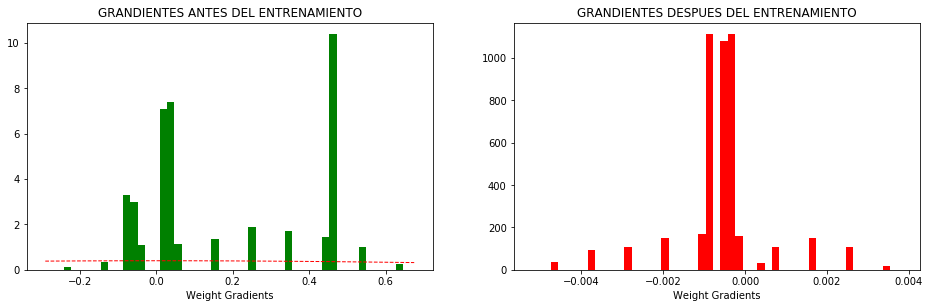

In [105]:
plt.figure(2,figsize=(16,10))
plt.subplot(2, 2, 1)
mu=0
sigma=1
n, bins, patches = plt.hist(evaluated_gradients, density=True, facecolor='g', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('GRANDIENTES ANTES DEL ENTRENAMIENTO')
plt.xlabel('Weight Gradients')
plt.subplot(2, 2, 2)
n, bins, patches = plt.hist(evaluated_gradients1, density=True, facecolor='r', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('GRANDIENTES DESPUES DEL ENTRENAMIENTO')
plt.xlabel('Weight Gradients')





<div class=text-justify>
    En esta primera gráfica podemos ver el gradiente de los pesos antes y después de realizarse el entrenamiento, una vez que se crea la red tiene una distribución bastante aleatoria, pero cuando en el entrenamiento <b>Backpropagation</b> ya ha ocurrido la gradiente de los pesos, la característica es que toma una distribucióon más homogénea con algunos valores en los extremos.
    </div>
 

<b>c) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento pero ahora entrenando una red mucho más profunda de 6 capas, 5 capas escondidas y 1 de salida. Utilice el inicializador de pesos *uniform* el cual inicializa mediante una distribución uniforme entre $-1/\sqrt{N}$ y $1/\sqrt{N}$ para cada capa, con $N$ el número de neuronas de la capa anterior. Por simplicidad visualice las 3-4 primeras capas de la red. Comente si observa el efecto del *gradiente desvaneciente* antes y/o después de entrenar.</b>

In [106]:
model = Sequential()

model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients_layer1 = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients_layer1 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients_layer2 = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients_layer2 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

model.add(Dense(256,  kernel_initializer='uniform',activation='sigmoid'))
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients_layer3 = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients_layer3 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled));


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 521us/step - loss: 1.0588 - val_loss: 1.1022
Epoch 2/250
9745/9745 [==============================] - 4s 396us/step - loss: 1.0629 - val_loss: 1.0191
Epoch 3/250
9745/9745 [==============================] - 4s 398us/step - loss: 1.0525 - val_loss: 1.0572
Epoch 4/250
9745/9745 [==============================] - 4s 394us/step - loss: 1.0444 - val_loss: 1.1417
Epoch 5/250
9745/9745 [==============================] - 4s 397us/step - loss: 1.0452 - val_loss: 1.3532
Epoch 6/250
9745/9745 [==============================] - 4s 402us/step - loss: 1.0394 - val_loss: 1.2132
Epoch 7/250
9745/9745 [==============================] - 4s 393us/step - loss: 1.0412 - val_loss: 1.0395
Epoch 8/250
9745/9745 [==============================] - 4s 392us/step - loss: 1.0356 - val_loss: 1.2123
Epoch 9/250
9745/9745 [==============================] - 4s 398us/step - loss: 1.0321 - val_loss: 1.0242
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 3s 346us/step - loss: 1.0049 - val_loss: 1.0458
Epoch 79/250
9745/9745 [==============================] - 3s 347us/step - loss: 1.0093 - val_loss: 1.0104
Epoch 80/250
9745/9745 [==============================] - 3s 349us/step - loss: 1.0060 - val_loss: 1.2225
Epoch 81/250
9745/9745 [==============================] - 3s 347us/step - loss: 1.0072 - val_loss: 1.0529
Epoch 82/250
9745/9745 [==============================] - 3s 359us/step - loss: 1.0060 - val_loss: 1.0253
Epoch 83/250
9745/9745 [==============================] - 3s 350us/step - loss: 1.0069 - val_loss: 1.0617
Epoch 84/250
9745/9745 [==============================] - 3s 354us/step - loss: 1.0047 - val_loss: 1.0825
Epoch 85/250
9745/9745 [==============================] - 3s 347us/step - loss: 1.0089 - val_loss: 1.0164
Epoch 86/250
9745/9745 [==============================] - 3s 346us/step - loss: 1.0063 - val_loss: 1.0121
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 3s 348us/step - loss: 0.0442 - val_loss: 0.0751
Epoch 156/250
9745/9745 [==============================] - 3s 347us/step - loss: 0.0430 - val_loss: 0.0496
Epoch 157/250
9745/9745 [==============================] - 3s 358us/step - loss: 0.0417 - val_loss: 0.0391
Epoch 158/250
9745/9745 [==============================] - 3s 347us/step - loss: 0.0424 - val_loss: 0.0369
Epoch 159/250
9745/9745 [==============================] - 3s 347us/step - loss: 0.0407 - val_loss: 0.0497
Epoch 160/250
9745/9745 [==============================] - 3s 351us/step - loss: 0.0401 - val_loss: 0.0349
Epoch 161/250
9745/9745 [==============================] - 3s 347us/step - loss: 0.0401 - val_loss: 0.0347
Epoch 162/250
9745/9745 [==============================] - 3s 358us/step - loss: 0.0392 - val_loss: 0.0345
Epoch 163/250
9745/9745 [==============================] - 4s 396us/step - loss: 0.0384 - val_loss: 0.0543
Epoch 164/250
9745/9745 [============

In [107]:
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients1 = K.gradients(loss, model.layers[0].trainable_weights ) #We can now calculate the gradients.
gradients2 = K.gradients(loss, model.layers[1].trainable_weights )[0]
gradients3 = K.gradients(loss, model.layers[2].trainable_weights )[0]
sess = K.get_session()
evaluated_gradients1 = sess.run(gradients1,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients1 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients1]
evaluated_gradients2 = sess.run(gradients2,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients2 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients2]
evaluated_gradients3 = sess.run(gradients3,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients3 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients3]

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


Text(0.5, 0, 'Weight Gradients')

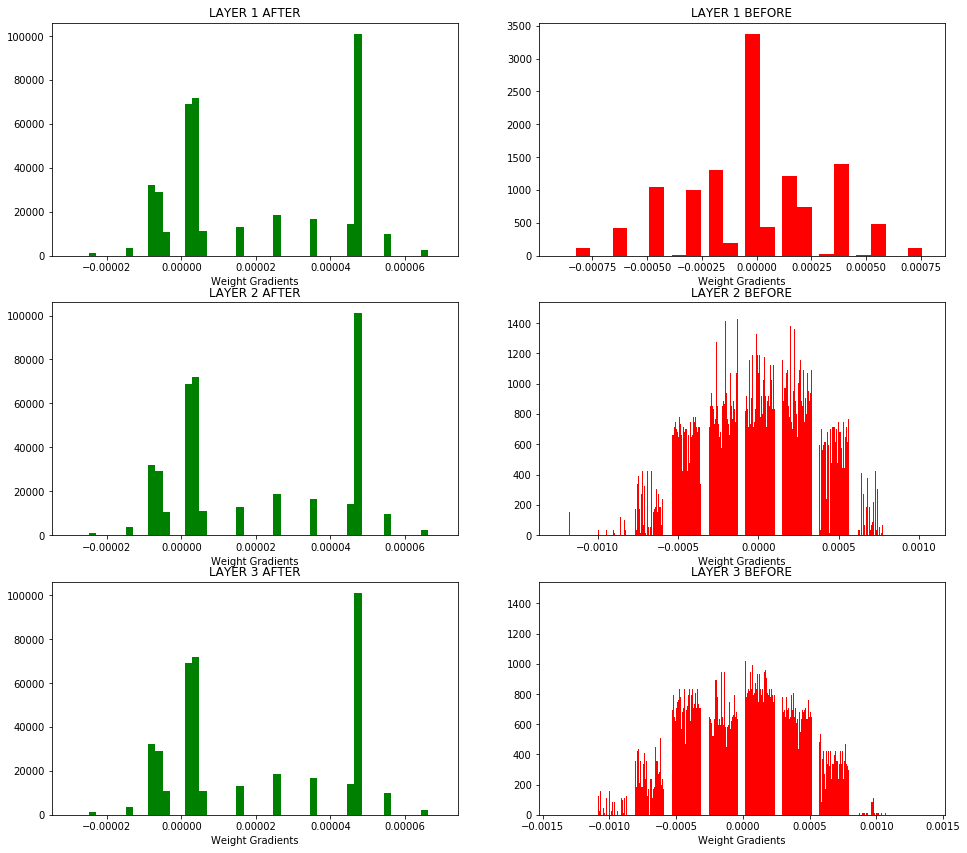

In [108]:
plt.figure(2,figsize=(16,30))
plt.subplot(6, 2, 1)
mu=0
sigma=1
n, bins, patches = plt.hist(evaluated_gradients_layer1, density=True, facecolor='g', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 1 AFTER')
plt.xlabel('Weight Gradients')
plt.subplot(6, 2, 2)
n, bins, patches = plt.hist(evaluated_gradients1, density=True, facecolor='r', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 1 BEFORE')
plt.xlabel('Weight Gradients')
plt.subplot(6, 2, 3)
mu=0
sigma=1
n, bins, patches = plt.hist(evaluated_gradients_layer2, density=True, facecolor='g', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 2 AFTER')
plt.xlabel('Weight Gradients')
plt.subplot(6, 2, 4)
n, bins, patches = plt.hist(evaluated_gradients2, density=True, facecolor='r', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 2 BEFORE')
plt.xlabel('Weight Gradients')
plt.subplot(6, 2, 5)
mu=0
sigma=1
n, bins, patches = plt.hist(evaluated_gradients_layer3, density=True, facecolor='g', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 3 AFTER')
plt.xlabel('Weight Gradients')
plt.subplot(6, 2, 6)
n, bins, patches = plt.hist(evaluated_gradients3, density=True, facecolor='r', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 3 BEFORE')
plt.xlabel('Weight Gradients')


<div class=text-justify>
En esta segunda sección nos encontramos con una estructura neuronal más profunda, cuyo tiempo de ejecución es mas prolongado, el comportamiento que vamos a a analizar es de las tres primeras capas, y podemos ver claramente como el gradiente va transformandose en cada una de las capas superiores, acá encontramos un breve indicio de como se empieza a desvanecer el gradiente de los pesos una vez que ha ocurrido el entrenamiento, cuando tenemos redes muy complejas y con una proporción directa al número de capas de la red.
    </div>
 

<b>d) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento, pero ahora entrenando la red profunda con el inicializador de Glorot [[1]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/(N_{in}+N_{out})}$  y $\sqrt{6/(N_{in}+N_{out})}$ . Por simplicidad visualice las 3-4 primeras capas de la red. Comente si el efecto del *gradiente desvaneciente* se amortigua antes y/o después de entrenar.</b>

In [109]:
model = Sequential()

model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients_layer1 = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients_layer1 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients_layer2 = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients_layer2 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

model.add(Dense(256,  kernel_initializer='glorot_uniform',activation='sigmoid'))
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients_layer3 = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients_layer3 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled));


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 522us/step - loss: 1.1232 - val_loss: 1.6460
Epoch 2/250
9745/9745 [==============================] - 4s 411us/step - loss: 1.1116 - val_loss: 1.0660
Epoch 3/250
9745/9745 [==============================] - 4s 403us/step - loss: 1.0725 - val_loss: 1.2350
Epoch 4/250
9745/9745 [==============================] - 4s 404us/step - loss: 1.0551 - val_loss: 1.0403
Epoch 5/250
9745/9745 [==============================] - 4s 400us/step - loss: 0.9639 - val_loss: 0.8292
Epoch 6/250
9745/9745 [==============================] - 5s 496us/step - loss: 0.5685 - val_loss: 0.2124
Epoch 7/250
9745/9745 [==============================] - 4s 455us/step - loss: 0.2837 - val_loss: 0.2000
Epoch 8/250
9745/9745 [==============================] - 5s 491us/step - loss: 0.2865 - val_loss: 0.1563
Epoch 9/250
9745/9745 [==============================] - 5s 479us/step - loss: 0.2465 - val_loss: 0.1121
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 4s 450us/step - loss: 0.0364 - val_loss: 0.0942
Epoch 79/250
9745/9745 [==============================] - 5s 468us/step - loss: 0.0384 - val_loss: 0.0240
Epoch 80/250
9745/9745 [==============================] - 5s 480us/step - loss: 0.0352 - val_loss: 0.0206
Epoch 81/250
9745/9745 [==============================] - 4s 445us/step - loss: 0.0389 - val_loss: 0.0744
Epoch 82/250
9745/9745 [==============================] - 4s 424us/step - loss: 0.0457 - val_loss: 0.0250
Epoch 83/250
9745/9745 [==============================] - 4s 433us/step - loss: 0.0352 - val_loss: 0.0268
Epoch 84/250
9745/9745 [==============================] - 4s 421us/step - loss: 0.0289 - val_loss: 0.0191
Epoch 85/250
9745/9745 [==============================] - 4s 419us/step - loss: 0.0437 - val_loss: 0.0450
Epoch 86/250
9745/9745 [==============================] - 4s 409us/step - loss: 0.0288 - val_loss: 0.0195
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 4s 439us/step - loss: 0.0155 - val_loss: 0.0117
Epoch 156/250
9745/9745 [==============================] - 5s 481us/step - loss: 0.0161 - val_loss: 0.0126
Epoch 157/250
9745/9745 [==============================] - 5s 462us/step - loss: 0.0123 - val_loss: 0.0139
Epoch 158/250
9745/9745 [==============================] - 4s 440us/step - loss: 0.0100 - val_loss: 0.0087
Epoch 159/250
9745/9745 [==============================] - 4s 457us/step - loss: 0.0171 - val_loss: 0.0080
Epoch 160/250
9745/9745 [==============================] - 4s 418us/step - loss: 0.0120 - val_loss: 0.0082
Epoch 161/250
9745/9745 [==============================] - 4s 433us/step - loss: 0.0167 - val_loss: 0.0085
Epoch 162/250
9745/9745 [==============================] - 4s 419us/step - loss: 0.0160 - val_loss: 0.0087
Epoch 163/250
9745/9745 [==============================] - 4s 449us/step - loss: 0.0182 - val_loss: 0.1123
Epoch 164/250
9745/9745 [============

In [110]:
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients1 = K.gradients(loss, model.layers[0].trainable_weights ) #We can now calculate the gradients.
gradients2 = K.gradients(loss, model.layers[1].trainable_weights )[0]
gradients3 = K.gradients(loss, model.layers[2].trainable_weights )[0]
sess = K.get_session()
evaluated_gradients1 = sess.run(gradients1,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients1 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients1]
evaluated_gradients2 = sess.run(gradients2,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients2 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients2]
evaluated_gradients3 = sess.run(gradients3,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients3 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients3]

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


Text(0.5, 0, 'Weight Gradients')

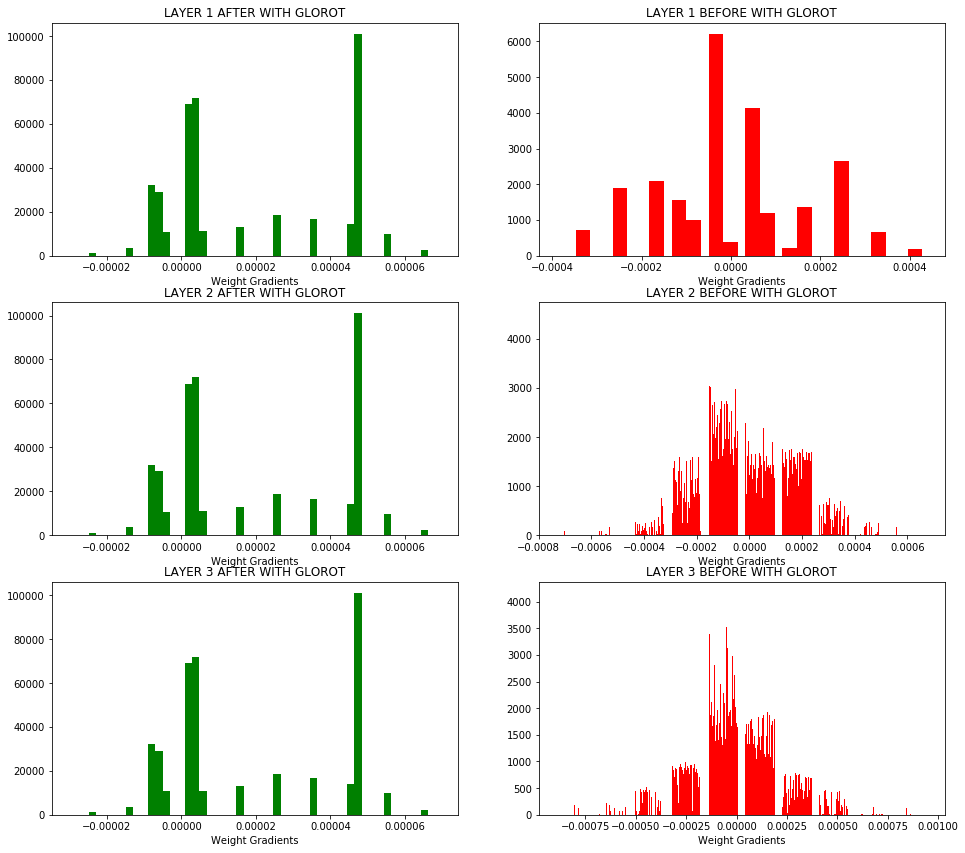

In [111]:
plt.figure(2,figsize=(16,30))
plt.subplot(6, 2, 1)
mu=0
sigma=1
n, bins, patches = plt.hist(evaluated_gradients_layer1, density=True, facecolor='g', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 1 AFTER WITH GLOROT')
plt.xlabel('Weight Gradients')
plt.subplot(6, 2, 2)
n, bins, patches = plt.hist(evaluated_gradients1, density=True, facecolor='r', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 1 BEFORE WITH GLOROT')
plt.xlabel('Weight Gradients')
plt.subplot(6, 2, 3)
mu=0
sigma=1
n, bins, patches = plt.hist(evaluated_gradients_layer2, density=True, facecolor='g', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 2 AFTER WITH GLOROT')
plt.xlabel('Weight Gradients')
plt.subplot(6, 2, 4)
n, bins, patches = plt.hist(evaluated_gradients2, density=True, facecolor='r', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 2 BEFORE WITH GLOROT')
plt.xlabel('Weight Gradients')
plt.subplot(6, 2, 5)
mu=0
sigma=1
n, bins, patches = plt.hist(evaluated_gradients_layer3, density=True, facecolor='g', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 3 AFTER WITH GLOROT')
plt.xlabel('Weight Gradients')
plt.subplot(6, 2, 6)
n, bins, patches = plt.hist(evaluated_gradients3, density=True, facecolor='r', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 3 BEFORE WITH GLOROT')
plt.xlabel('Weight Gradients')

<div class=text-justify>
    En este caso con la iniciación de pesos <b>(GLOROT)</b> encontramos que una vez que ha comenzado el entrenamiento los gradientes se comportan de la misma forma y se observa el el fenómeno de gradiente desvaneciente con fuerza o mayor intensidad a partir de la tercera capa.
    </div>
 

<b>e) Vuelva a repetir la experimentación ahora cambiando la función de activación por ReLU, es decir, deberá visualizar los gradientes de los pesos de cada capa antes y después del entrenamiento, con inicialización *uniform* y comparar con la inicialización de He [[2]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/N_{in}}$ y $\sqrt{6/N_{in}} $. Comente si ocurre el mismo fenómeno anterior (para función sigmoidal) sobre el efecto del *gradiente desvaneciente* para la función ReLU. Explique la importancia de la inicialización de los pesos dependiendo de la arquitectura.</b>

In [84]:
model = Sequential()

model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients_layer1 = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients_layer1 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients_layer2 = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients_layer2 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

model.add(Dense(256,  kernel_initializer='he_uniform',activation='relu'))
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients_layer3 = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients_layer3 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd,loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled));


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 473us/step - loss: 0.1750 - val_loss: 0.0515
Epoch 2/250
9745/9745 [==============================] - 5s 468us/step - loss: 0.0250 - val_loss: 0.0394
Epoch 3/250
9745/9745 [==============================] - 5s 487us/step - loss: 0.0188 - val_loss: 0.0399
Epoch 4/250
9745/9745 [==============================] - 4s 386us/step - loss: 0.0171 - val_loss: 0.0357
Epoch 5/250
9745/9745 [==============================] - 4s 447us/step - loss: 0.0151 - val_loss: 0.0521
Epoch 6/250
9745/9745 [==============================] - 4s 428us/step - loss: 0.0142 - val_loss: 0.0327
Epoch 7/250
9745/9745 [==============================] - 4s 382us/step - loss: 0.0113 - val_loss: 0.0319
Epoch 8/250
9745/9745 [==============================] - 4s 434us/step - loss: 0.0100 - val_loss: 0.0325
Epoch 9/250
9745/9745 [==============================] - 4s 395us/step - loss: 0.0081 - val_loss: 0.0299
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 5s 465us/step - loss: 0.0019 - val_loss: 0.0190
Epoch 79/250
9745/9745 [==============================] - 5s 545us/step - loss: 0.0019 - val_loss: 0.0184
Epoch 80/250
9745/9745 [==============================] - 5s 486us/step - loss: 0.0019 - val_loss: 0.0189
Epoch 81/250
9745/9745 [==============================] - 4s 460us/step - loss: 0.0018 - val_loss: 0.0186
Epoch 82/250
9745/9745 [==============================] - 5s 516us/step - loss: 0.0019 - val_loss: 0.0188
Epoch 83/250
9745/9745 [==============================] - 5s 512us/step - loss: 0.0018 - val_loss: 0.0189
Epoch 84/250
9745/9745 [==============================] - 5s 468us/step - loss: 0.0018 - val_loss: 0.0183
Epoch 85/250
9745/9745 [==============================] - 5s 469us/step - loss: 0.0018 - val_loss: 0.0190
Epoch 86/250
9745/9745 [==============================] - 5s 536us/step - loss: 0.0018 - val_loss: 0.0186
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 4s 416us/step - loss: 0.0013 - val_loss: 0.0165
Epoch 156/250
9745/9745 [==============================] - 4s 414us/step - loss: 0.0013 - val_loss: 0.0164
Epoch 157/250
9745/9745 [==============================] - 4s 435us/step - loss: 0.0013 - val_loss: 0.0170
Epoch 158/250
9745/9745 [==============================] - 4s 458us/step - loss: 0.0013 - val_loss: 0.0167
Epoch 159/250
9745/9745 [==============================] - 4s 418us/step - loss: 0.0013 - val_loss: 0.0168
Epoch 160/250
9745/9745 [==============================] - 4s 408us/step - loss: 0.0013 - val_loss: 0.0168
Epoch 161/250
9745/9745 [==============================] - 4s 453us/step - loss: 0.0012 - val_loss: 0.0165
Epoch 162/250
9745/9745 [==============================] - 5s 468us/step - loss: 0.0012 - val_loss: 0.0163
Epoch 163/250
9745/9745 [==============================] - 4s 421us/step - loss: 0.0013 - val_loss: 0.0165
Epoch 164/250
9745/9745 [============

In [85]:
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients1 = K.gradients(loss, model.layers[0].trainable_weights ) #We can now calculate the gradients.
gradients2 = K.gradients(loss, model.layers[1].trainable_weights )[0]
gradients3 = K.gradients(loss, model.layers[2].trainable_weights )[0]
sess = K.get_session()
evaluated_gradients1 = sess.run(gradients1,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients1 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients1]
evaluated_gradients2 = sess.run(gradients2,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients2 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients2]
evaluated_gradients3 = sess.run(gradients3,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients3 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients3]

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


Text(0.5, 0, 'Weight Gradients')

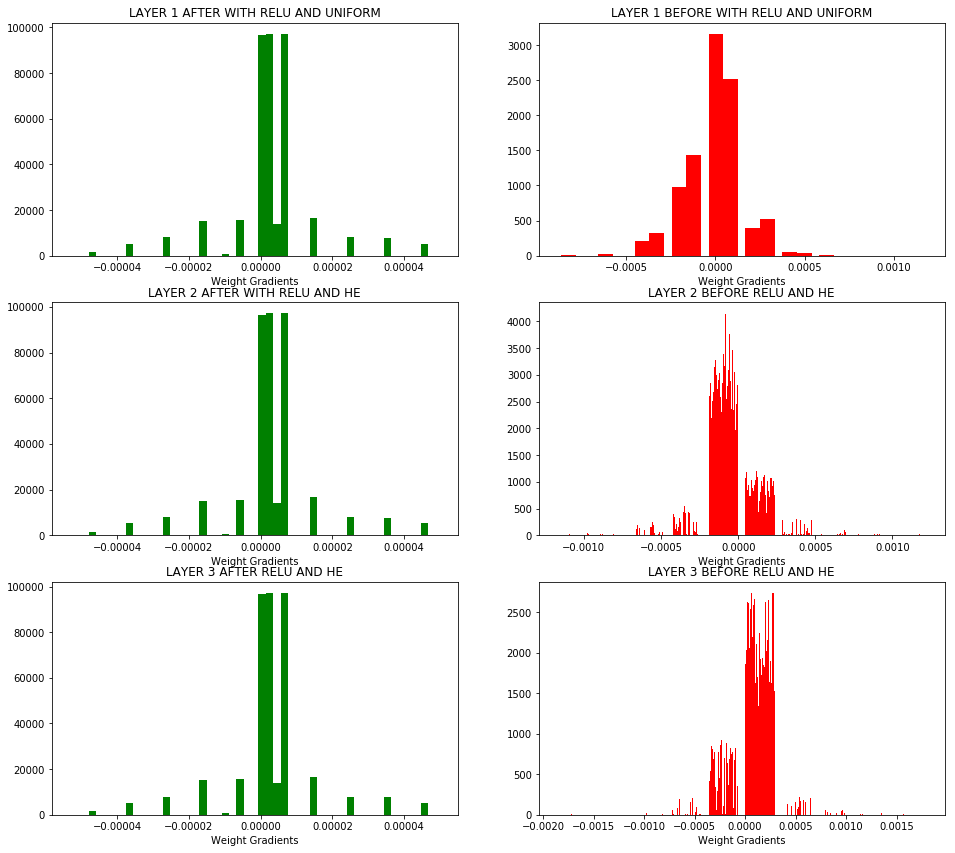

In [103]:
plt.figure(2,figsize=(16,30))
plt.subplot(6, 2, 1)
mu=0
sigma=1
n, bins, patches = plt.hist(evaluated_gradients_layer1, density=True, facecolor='g', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 1 AFTER WITH RELU AND UNIFORM')
plt.xlabel('Weight Gradients')
plt.subplot(6, 2, 2)
n, bins, patches = plt.hist(evaluated_gradients1, density=True, facecolor='r', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 1 BEFORE WITH RELU AND UNIFORM')
plt.xlabel('Weight Gradients')
plt.subplot(6, 2, 3)
mu=0
sigma=1
n, bins, patches = plt.hist(evaluated_gradients_layer2, density=True, facecolor='g', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 2 AFTER WITH RELU AND HE')
plt.xlabel('Weight Gradients')
plt.subplot(6, 2, 4)
n, bins, patches = plt.hist(evaluated_gradients2, density=True, facecolor='r', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 2 BEFORE RELU AND HE')
plt.xlabel('Weight Gradients')
plt.subplot(6, 2, 5)
mu=0
sigma=1
n, bins, patches = plt.hist(evaluated_gradients_layer3, density=True, facecolor='g', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 3 AFTER RELU AND HE')
plt.xlabel('Weight Gradients')
plt.subplot(6, 2, 6)
n, bins, patches = plt.hist(evaluated_gradients3, density=True, facecolor='r', )
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title('LAYER 3 BEFORE RELU AND HE')
plt.xlabel('Weight Gradients')

<div class=text-justify>
 Efectivamente y como era de esperarse en este caso con una función de activación diferente, vemos que el efecto del gradiente desvaneciente aparece, pero como se observa en la gráfica no con la misma intensidad que en la función sigmoidal, si podemos captar que el comportamiento se encuentra un poco <b>sparce</b> concentrando el gradiente en unos valores predeterminados.
    </div>
 

<b>f) ¿Qué es lo que sucede con la red más profunda? ¿El modelo logra convergencia en su entrenamiento? Modifique aspectos estructurales (funciones de activación, inicializadores, regularización, *momentum*, variación de tasa de aprendizaje, entre otros) de la red profunda de 6 capas definida anteriormente (no modifique la profundidad ni el número de neuronas) para lograr un error cuadrático medio (*mse*) similar o menor al de una red no profunda, como la definida en b) en esta sección, sobre el conjunto de pruebas.</b>

In [93]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01), activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01),activation='sigmoid'))
model.add(Dense(256,  kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01),activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01),activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01),activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = Adagrad(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train_scaled, batch_size=50, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled));

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1277, kernel_initializer="uniform", activation="sigmoid", kernel_regularizer=<keras.reg...)`
  
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="uniform", activation="sigmoid", kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="uniform", activation="sigmoid", kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:5: User

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 530us/step - loss: 1.1655 - val_loss: 1.0319
Epoch 2/250
9745/9745 [==============================] - 4s 382us/step - loss: 1.0153 - val_loss: 1.0119
Epoch 3/250
9745/9745 [==============================] - 4s 426us/step - loss: 1.0077 - val_loss: 1.1021
Epoch 4/250
9745/9745 [==============================] - 5s 549us/step - loss: 1.0106 - val_loss: 1.0738
Epoch 5/250
9745/9745 [==============================] - 4s 415us/step - loss: 1.0067 - val_loss: 1.0638
Epoch 6/250
9745/9745 [==============================] - 4s 402us/step - loss: 1.0041 - val_loss: 1.0672
Epoch 7/250
9745/9745 [==============================] - 4s 393us/step - loss: 1.0045 - val_loss: 1.0957
Epoch 8/250
9745/9745 [==============================] - 4s 444us/step - loss: 1.0054 - val_loss: 1.0305
Epoch 9/250
9745/9745 [==============================] - 4s 387us/step - loss: 1.0044 - val_loss: 1.0632
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 3s 346us/step - loss: 1.0012 - val_loss: 1.0924
Epoch 79/250
9745/9745 [==============================] - 3s 347us/step - loss: 1.0015 - val_loss: 1.0427
Epoch 80/250
9745/9745 [==============================] - 4s 366us/step - loss: 1.0017 - val_loss: 1.0491
Epoch 81/250
9745/9745 [==============================] - 4s 409us/step - loss: 1.0016 - val_loss: 1.0839
Epoch 82/250
9745/9745 [==============================] - 4s 360us/step - loss: 1.0010 - val_loss: 1.0740
Epoch 83/250
9745/9745 [==============================] - 3s 351us/step - loss: 1.0010 - val_loss: 1.0656
Epoch 84/250
9745/9745 [==============================] - 3s 345us/step - loss: 1.0009 - val_loss: 1.1158
Epoch 85/250
9745/9745 [==============================] - 4s 415us/step - loss: 1.0020 - val_loss: 1.0469
Epoch 86/250
9745/9745 [==============================] - 4s 362us/step - loss: 1.0014 - val_loss: 1.0520
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 3s 343us/step - loss: 1.0010 - val_loss: 1.0735
Epoch 156/250
9745/9745 [==============================] - 3s 341us/step - loss: 1.0007 - val_loss: 1.0658
Epoch 157/250
9745/9745 [==============================] - 3s 342us/step - loss: 1.0011 - val_loss: 1.0602
Epoch 158/250
9745/9745 [==============================] - 4s 385us/step - loss: 1.0004 - val_loss: 1.0898
Epoch 159/250
9745/9745 [==============================] - 3s 353us/step - loss: 1.0009 - val_loss: 1.0601
Epoch 160/250
9745/9745 [==============================] - 3s 342us/step - loss: 1.0009 - val_loss: 1.0507
Epoch 161/250
9745/9745 [==============================] - 3s 343us/step - loss: 1.0009 - val_loss: 1.0613
Epoch 162/250
9745/9745 [==============================] - 3s 351us/step - loss: 1.0011 - val_loss: 1.0676
Epoch 163/250
9745/9745 [==============================] - 4s 394us/step - loss: 1.0012 - val_loss: 1.0810
Epoch 164/250
9745/9745 [============

Text(0.5, 0, 'Epochs')

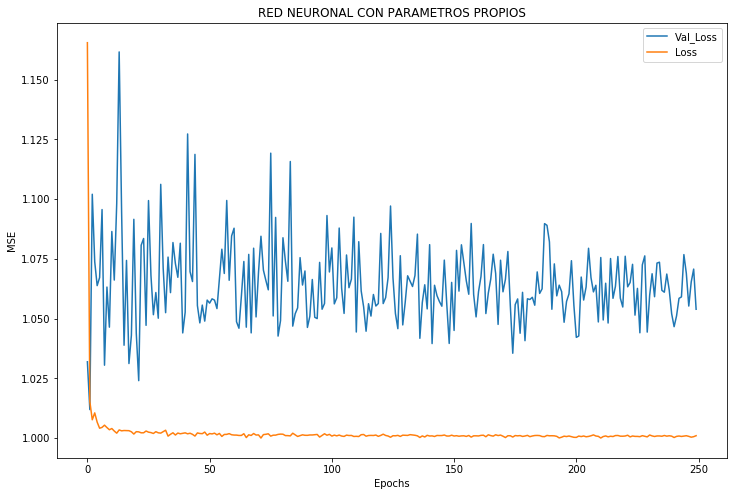

In [94]:
plt.figure(1,figsize=(12,8))
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('RED NEURONAL CON PARAMETROS PROPIOS')
plt.ylabel('MSE')
plt.xlabel('Epochs')

<div class=text-justify>
Para esta situación particular, extrapolando lo construido en el primer punto de la tarea, construimos una red neuronal con los mejores parámetros que se consideraron correspondientes con base en las actividades realizadas anteriormente, los cuales debían darnos un buen resultado, manteniendo la profundidad de la red y las unidades por cada capa, el resultado fue en cierta parte decepcionante, pues el error tiene una escala muy alta y cuando logra converger,lamentablemente no logra un mínimo que sea satisfactorio para el proceso, se podrian estimar si algunos parámetros estan causando este inconveniente o si al tener una red profunda no es necesario modificar todos los parámetros analizados en la sección anterior.
    </div>
 

<b>g) Experimente con la utilización de una función activación auxiliar (debido a que aproxima) a '**ReLU**' y que es continua derivable (**softplus**) ¿Cuál es el beneficio de ésta con respecto ReLU? Comente.</b>

In [96]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',W_regularizer=regularizers.l2(0.01), activation='softplus'))
model.add(Dense(256, kernel_initializer='he_uniform',W_regularizer=regularizers.l2(0.01),activation='softplus'))
model.add(Dense(256,  kernel_initializer='he_uniform',W_regularizer=regularizers.l2(0.01),activation='softplus'))
model.add(Dense(256, kernel_initializer='he_uniform',W_regularizer=regularizers.l2(0.01),activation='softplus'))
model.add(Dense(256, kernel_initializer='he_uniform',W_regularizer=regularizers.l2(0.01),activation='softplus'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = Adagrad(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train_scaled, batch_size=50, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled));


C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1277, kernel_initializer="he_uniform", activation="softplus", kernel_regularizer=<keras.reg...)`
  
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="he_uniform", activation="softplus", kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="he_uniform", activation="softplus", kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launche

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 543us/step - loss: 234.2448 - val_loss: 20.3724
Epoch 2/250
9745/9745 [==============================] - 4s 401us/step - loss: 19.8703 - val_loss: 19.4566
Epoch 3/250
9745/9745 [==============================] - 4s 442us/step - loss: 19.1600 - val_loss: 18.9053
Epoch 4/250
9745/9745 [==============================] - 5s 497us/step - loss: 18.6847 - val_loss: 18.5100
Epoch 5/250
9745/9745 [==============================] - 5s 489us/step - loss: 18.3154 - val_loss: 18.1521
Epoch 6/250
9745/9745 [==============================] - 4s 448us/step - loss: 18.0116 - val_loss: 17.8740
Epoch 7/250
9745/9745 [==============================] - 5s 513us/step - loss: 17.7497 - val_loss: 17.6295
Epoch 8/250
9745/9745 [==============================] - 4s 443us/step - loss: 17.5197 - val_loss: 17.4113
Epoch 9/250
9745/9745 [==============================] - 4s 384us/step - loss: 17.3130 - val_lo

9745/9745 [==============================] - 4s 391us/step - loss: 10.8638 - val_loss: 10.8558
Epoch 152/250
9745/9745 [==============================] - 4s 429us/step - loss: 10.8448 - val_loss: 10.8358
Epoch 153/250
9745/9745 [==============================] - 4s 415us/step - loss: 10.8261 - val_loss: 10.8203
Epoch 154/250
9745/9745 [==============================] - 4s 402us/step - loss: 10.8080 - val_loss: 10.7998
Epoch 155/250
9745/9745 [==============================] - 4s 396us/step - loss: 10.7893 - val_loss: 10.7812
Epoch 156/250
9745/9745 [==============================] - 4s 424us/step - loss: 10.7709 - val_loss: 10.7616
Epoch 157/250
9745/9745 [==============================] - 4s 404us/step - loss: 10.7525 - val_loss: 10.7445
Epoch 158/250
9745/9745 [==============================] - 4s 384us/step - loss: 10.7343 - val_loss: 10.7262
Epoch 159/250
9745/9745 [==============================] - 4s 378us/step - loss: 10.7166 - val_loss: 10.7100
Epoch 160/250
9745/9745 [========

Text(0.5, 0, 'Epochs')

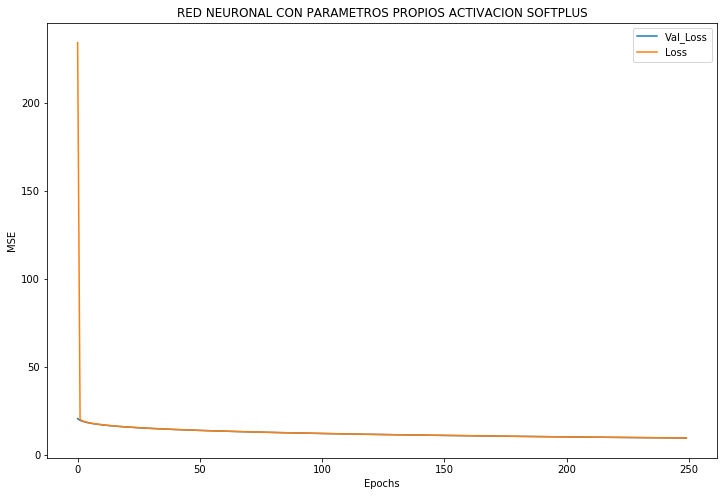

In [97]:
plt.figure(1,figsize=(12,8))
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('RED NEURONAL CON PARAMETROS PROPIOS ACTIVACION SOFTPLUS')
plt.ylabel('MSE')
plt.xlabel('Epochs')

<div class=text-justify>
Y en este caso, verificamos que el problema no eran los parámetros estipulados anteriormente sino la función de activación <b>ReLU</b>, en el entrenamiento del modelo anterior se hizo el entrenamiento con la variante suave de <b>ReLU</b> que es <b>Softplus</b>, y los resultados fueron impactantemente positivos, aunque el error en la primera iteración fue muy alto, el tiempo de converger del algoritmo fue muy corto, encontró un error relativamente aceptable y ademas que el comportamiento de la función de pérdida de entrenamiento es muy similar con la de validación lo que es un perfecto indicador de que los parámetros con la  combinación de la función de activación entregan un buen resultado.
    </div>
 

<b>h) Pruebe con utilizar una red *shallow* (poco profunda), es decir, sitúe todas las neuronas en una única capa ¿Qué sucede con la convergencia del algoritmo? ¿Por qué sucede este fenómeno?</b>

In [100]:
model = Sequential()
model.add(Dense(1024, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
model.compile(optimizer=sgd,loss='mean_squared_error')
history=model.fit(X_train_scaled.values, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled.values, y_val_scaled))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.4761 - val_loss: 0.0197
Epoch 2/250
9745/9745 [==============================] - 9s 878us/step - loss: 0.0155 - val_loss: 0.0217
Epoch 3/250
9745/9745 [==============================] - 9s 948us/step - loss: 0.0113 - val_loss: 0.0109
Epoch 4/250
9745/9745 [==============================] - 9s 968us/step - loss: 0.0093 - val_loss: 0.0100
Epoch 5/250
9745/9745 [==============================] - 9s 897us/step - loss: 0.0079 - val_loss: 0.0084
Epoch 6/250
9745/9745 [==============================] - 9s 908us/step - loss: 0.0069 - val_loss: 0.0085
Epoch 7/250
9745/9745 [==============================] - 8s 850us/step - loss: 0.0061 - val_loss: 0.0073
Epoch 8/250
9745/9745 [==============================] - 9s 884us/step - loss: 0.0058 - val_loss: 0.0075
Epoch 9/250
9745/9745 [==============================] - 8s 816us/step - loss: 0.0053 - val_loss: 0.0062
Epoch 10

9745/9745 [==============================] - 9s 893us/step - loss: 9.7300e-04 - val_loss: 0.0029
Epoch 154/250
9745/9745 [==============================] - 9s 902us/step - loss: 9.5661e-04 - val_loss: 0.0030
Epoch 155/250
9745/9745 [==============================] - 9s 899us/step - loss: 9.8336e-04 - val_loss: 0.0027
Epoch 156/250
9745/9745 [==============================] - 9s 919us/step - loss: 9.6721e-04 - val_loss: 0.0027
Epoch 157/250
9745/9745 [==============================] - 9s 925us/step - loss: 9.5118e-04 - val_loss: 0.0027
Epoch 158/250
9745/9745 [==============================] - 8s 869us/step - loss: 9.5715e-04 - val_loss: 0.0028
Epoch 159/250
9745/9745 [==============================] - 10s 1000us/step - loss: 9.7316e-04 - val_loss: 0.0029
Epoch 160/250
9745/9745 [==============================] - 9s 938us/step - loss: 9.6177e-04 - val_loss: 0.0030
Epoch 161/250
9745/9745 [==============================] - 9s 951us/step - loss: 9.4142e-04 - val_loss: 0.0028
Epoch 162/250

Epoch 227/250
9745/9745 [==============================] - 8s 868us/step - loss: 7.7441e-04 - val_loss: 0.0031
Epoch 228/250
9745/9745 [==============================] - 9s 935us/step - loss: 7.8490e-04 - val_loss: 0.0028
Epoch 229/250
9745/9745 [==============================] - 9s 908us/step - loss: 7.6828e-04 - val_loss: 0.0026
Epoch 230/250
9745/9745 [==============================] - 9s 943us/step - loss: 7.6164e-04 - val_loss: 0.0027
Epoch 231/250
9745/9745 [==============================] - 9s 904us/step - loss: 7.8861e-04 - val_loss: 0.0028
Epoch 232/250
9745/9745 [==============================] - 9s 944us/step - loss: 7.7054e-04 - val_loss: 0.0027
Epoch 233/250
9745/9745 [==============================] - 9s 930us/step - loss: 7.5878e-04 - val_loss: 0.0028
Epoch 234/250
9745/9745 [==============================] - 9s 934us/step - loss: 7.7181e-04 - val_loss: 0.0026
Epoch 235/250
9745/9745 [==============================] - 9s 923us/step - loss: 7.6269e-04 - val_loss: 0.0026
E

Text(0.5, 0, 'Epochs')

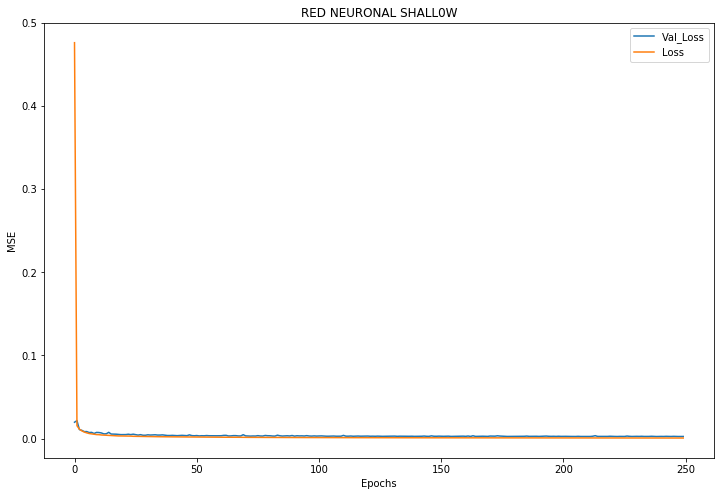

In [101]:
plt.figure(1,figsize=(12,8))
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('RED NEURONAL SHALL0W')
plt.ylabel('MSE')
plt.xlabel('Epochs')

<div class=text-justify>
Esta arquitectura de red es la mejor que se prueba en todo el ejercicio, parte con un error mínimo y se estabiliza palcialmente cerca de 0, con un comportamiento identico para ambas funciones de pérdidas, en conclusión no en todos los casos es necesario tener redes profundas con muchas capas, también con ciertas estructuras que puedan  parecer mas sencillas se pueden obtener resultados excelentes.
    </div>
 